In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df_gdp = pd.read_csv('data/gdp.csv') #Gross domestic product
df_students = pd.read_csv('data/studentsperformance.csv') #Students notes
df_car = pd.read_csv('data/table_i702t60.csv') #car loans

We first need to have the data in the form of numpy arrays

In [3]:
month_number = df_car.loc[:,'month'].values # with loc method im looking in all the rows only for the month column
                                            # that return a series and gets converted to an array with values method
interest = df_car.loc[:,'interest_paid'].values
principal = df_car.loc[:,'principal_paid'].values

### plot method

we can use `help(plt.plot)` if we forget how to put the arguments

with `plt.style.available` it returns a list of available styles to use

| character | description |
|    --     |    --       | 
|  ``'.'``     | point marker  |   
|    ``','``   |   pixel marker  |   
|    ``'o'``   |   circle marker  |   
|    ``'v'``   |   triangle_down marker  |   
|    ``'^'``   |   triangle_up marker  |   
|    ``'<'``   |   triangle_left marker  |   
|    ``'>'``   |   triangle_right marker  |   
|    ``'1'``   |   tri_down marker  |   
|    ``'2'``   |   tri_up marker  |   
|    ``'3'``   |   tri_left marker  |   
|    ``'4'``   |   tri_right marker  |   
|    ``'s'``   |   square marker  |   
|    ``'p'``   |   pentagon marker  |   
|    ``'*'``   |   star marker  |   
|    ``'h'``   |   hexagon1 marker  |   
|    ``'H'``   |   hexagon2 marker  |   
|    ``'+'``   |   plus marker  |   
|    ``'x'``   |   x marker  |   
|    ``'D'``   |   diamond marker  |   
|    ``'d'``   |   thin_diamond marker  |     
|    ``'_'``   |   hline marker  |   

| character | description |
|    --     |    --       | 
| ``'-'``      | solid line style |  
|    ``'--'``  |    dashed line style |  
|    ``'-.'``  |    dash-dot line style |  
|    ``':'``   |    dotted line style |  
    
    
plt.plot(x, y, c = 'color', markers= '-', markersize = 10)
    



In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

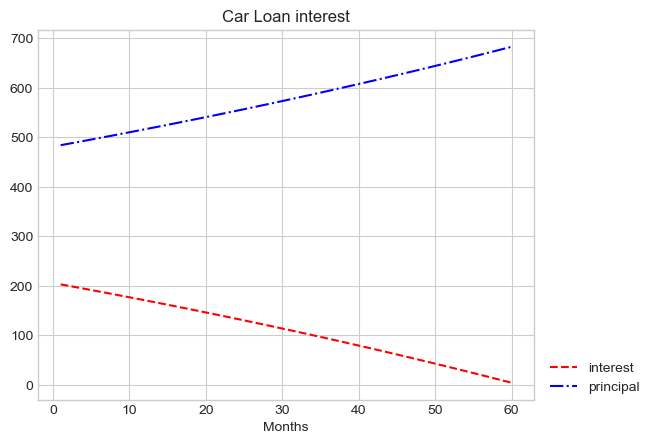

In [147]:
plt.style.use('seaborn-whitegrid')
plt.plot(month_number, interest, '--r', label='interest')
plt.plot(month_number, principal, '-.b' , label='principal')
plt.title('Car Loan interest')
plt.xlabel('Months')
plt.legend(loc=(1.02,0));

Text(0.5, 1.0, 'Monthly expenses')

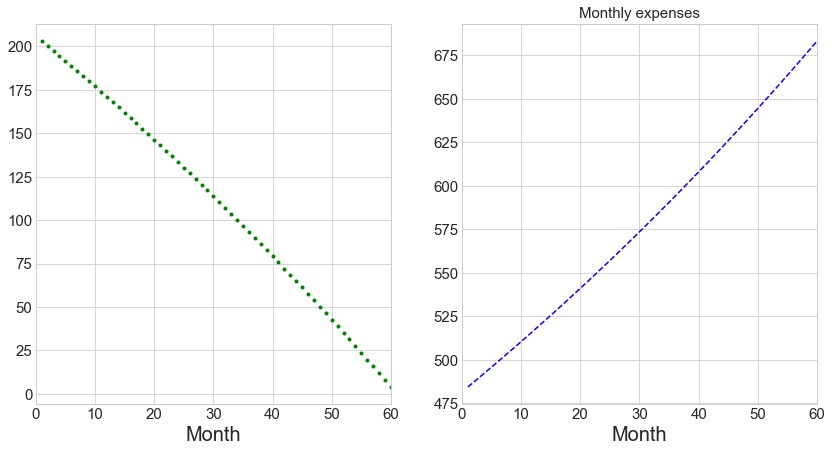

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))

ax1.plot(month_number, interest, '.g')
ax1.set_xlim(0,60)
ax1.set_xlabel('Month', fontsize = 20)
ax1.tick_params(labelsize = 15)


ax2.plot(month_number, principal, '--b')
ax2.set_xlim(0,60)
ax2.tick_params(labelsize = 15)
ax2.set_xlabel('Month', fontsize = 20)
ax2.set_title('Monthly expenses', fontsize= 15)




In [58]:
df_students.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770667
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257326
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.333333
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.333333
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.666667


In [53]:
df_students['mean'] = df_students.loc[:, ['math score', 'reading score', 'writing score']].sum(axis=1)/3
gender = df_students.groupby(['gender']).mean()
df_students['gender'].unique()


array(['female', 'male'], dtype=object)

<BarContainer object of 2 artists>

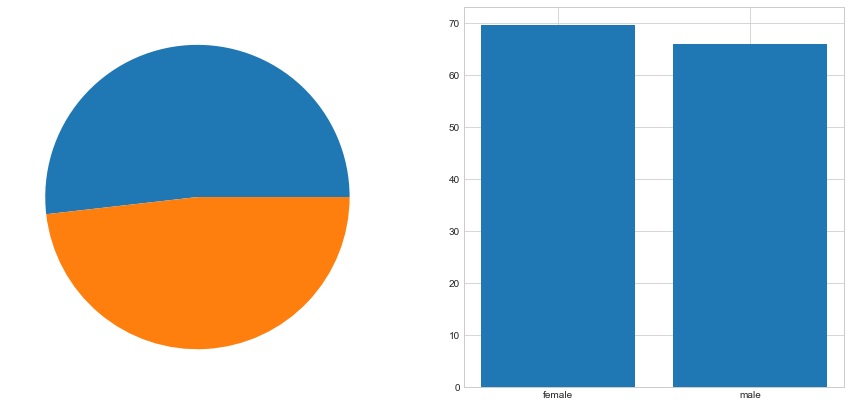

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,7))

ax1.pie(df_students['gender'].value_counts())
ax1.set_label(('x','y'))


ax2.bar(gender.index,gender['mean'])

In [122]:
col = df_gdp.loc[df_gdp['country']=='Colombia',['year','gdppc','popshare']].sort_values(by='year')
df_gdp.loc[df_gdp['country']=='Colombia'].sort_values('year')

,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
429,170,COL,Colombia,1880,64.933403,819.0000,NaN,0.002066
423,170,COL,Colombia,1890,63.957508,896.0000,NaN,0.002231
422,170,COL,Colombia,1900,63.108658,973.0000,NaN,0.002462
426,170,COL,Colombia,1910,62.411053,1162.0000,NaN,0.002764
432,170,COL,Colombia,1920,64.164398,1255.0000,NaN,0.003258
420,170,COL,Colombia,1930,67.440979,1474.0000,NaN,0.003769
424,170,COL,Colombia,1940,65.142769,1895.0000,NaN,0.003949
427,170,COL,Colombia,1950,65.747131,2153.0000,NaN,0.004696
430,170,COL,Colombia,1960,63.727448,2497.0000,NaN,0.005569
421,170,COL,Colombia,1970,65.329811,3094.0000,NaN,0.006144


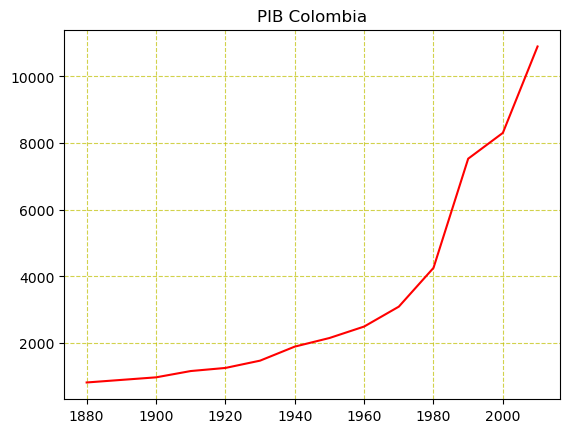

In [116]:
plt.plot(col['year'],col['gdppc'], 'r')
plt.title('PIB Colombia')
plt.grid(
    c = 'y',
    alpha = .7, # transparency
    linestyle = '--' #supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
)

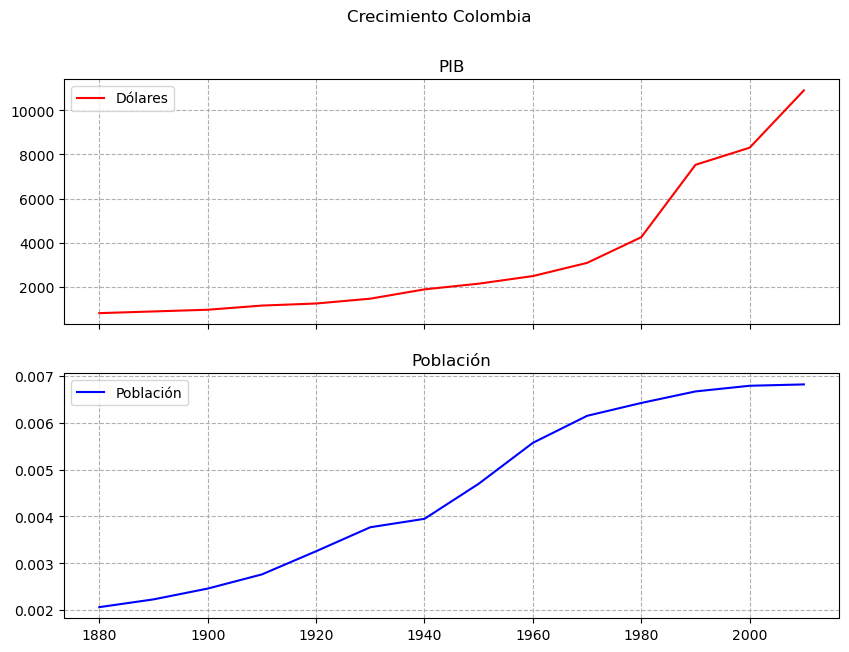

In [162]:
plt.style.use('default')
fig, axs = plt.subplots(2,1,figsize=(10,7),sharex=True)
fig.suptitle('Crecimiento Colombia')
axs[0].plot(col['year'],col['gdppc'], 'r', label = 'Dólares')
axs[0].grid(linestyle='--')
axs[0].set_title('PIB')
axs[0].legend()

axs[1].plot(col['year'],col['popshare'], 'b', label = 'Población')
axs[1].grid(linestyle='--')
axs[1].set_title('Población')
axs[1].legend()

fig.savefig('plot1.png', dpi = 300)

In [125]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on